# Lab

## Introduction of Neural Network

## OLS regression as a starting point

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

from scipy import stats
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

# These options determine the way floating point numbers are displayed.
np.set_printoptions(precision=4, suppress=True)

tf.random.set_seed(100)

/var/folders/hf/0mp7k_vd30z8kr8nkwwh037m0000gn/T/ipykernel_57846/2211786931.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
# define a nonlinear function to return f(x) =  2x^2 - x^3/3

def f(x):
    return  2 * x ** 2 - x ** 3 / 3

In [4]:
totalnum = 50

# generate totalnum data starting with -2 and stop with 4
x = np.linspace(start=-2, stop=4, num= totalnum )
type(x)
x

array([-2.    , -1.8776, -1.7551, -1.6327, -1.5102, -1.3878, -1.2653,
       -1.1429, -1.0204, -0.898 , -0.7755, -0.6531, -0.5306, -0.4082,
       -0.2857, -0.1633, -0.0408,  0.0816,  0.2041,  0.3265,  0.449 ,
        0.5714,  0.6939,  0.8163,  0.9388,  1.0612,  1.1837,  1.3061,
        1.4286,  1.551 ,  1.6735,  1.7959,  1.9184,  2.0408,  2.1633,
        2.2857,  2.4082,  2.5306,  2.6531,  2.7755,  2.898 ,  3.0204,
        3.1429,  3.2653,  3.3878,  3.5102,  3.6327,  3.7551,  3.8776,
        4.    ])

In [5]:
y = f(x)
y

array([10.6667,  9.2566,  7.9629,  6.7818,  5.7095,  4.7426,  3.8773,
        3.1098,  2.4366,  1.854 ,  1.3583,  0.9458,  0.6129,  0.3559,
        0.171 ,  0.0548,  0.0034,  0.0131,  0.0805,  0.2016,  0.373 ,
        0.5909,  0.8516,  1.1514,  1.4868,  1.854 ,  2.2494,  2.6692,
        3.1098,  3.5676,  4.0388,  4.5198,  5.007 ,  5.4966,  5.9849,
        6.4684,  6.9433,  7.406 ,  7.8527,  8.2799,  8.6838,  9.0608,
        9.4072,  9.7193,  9.9935, 10.226 , 10.4133, 10.5516, 10.6373,
       10.6667])

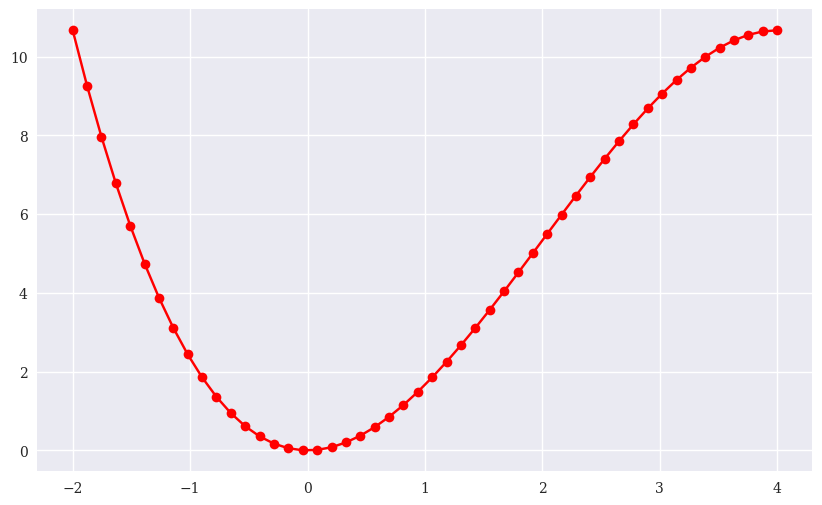

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-o');

In [7]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.12753019575177

In [8]:
alpha = y.mean() - beta * x.mean()
alpha

3.6615854505067333

In [9]:
y_ = alpha + beta * x

In [10]:
MSE = ((y - y_) ** 2).mean()

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f'slope={slope:.4f} | intercept={intercept:.4f} | r_value={r_value:.4f} | std_err={std_err:.4f} ')
y__ = intercept + slope*x


slope=1.1275 | intercept=3.6616 | r_value=0.5356 | std_err=0.2566 


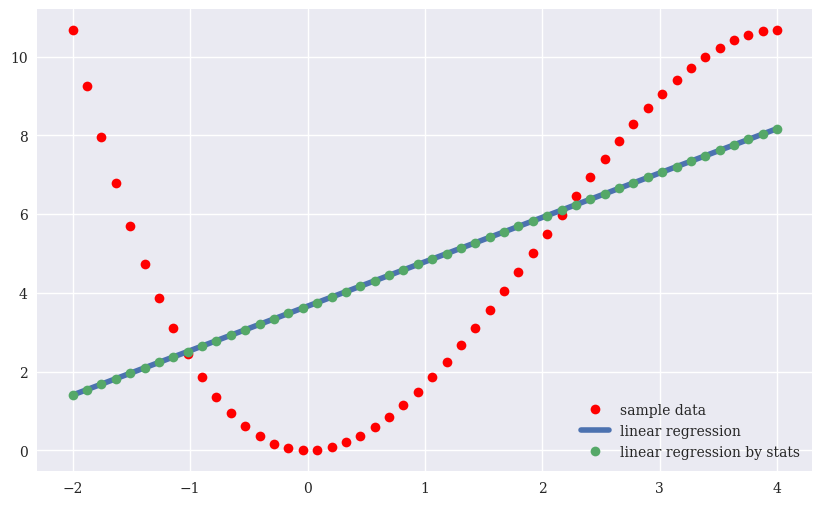

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=4.0, label='linear regression')
plt.plot(x, y__, 'o', lw=1.0, label='linear regression by stats')
plt.legend();

deg=1 | MSE=9.86872
deg=2 | MSE=2.07833
deg=3 | MSE=0.00000


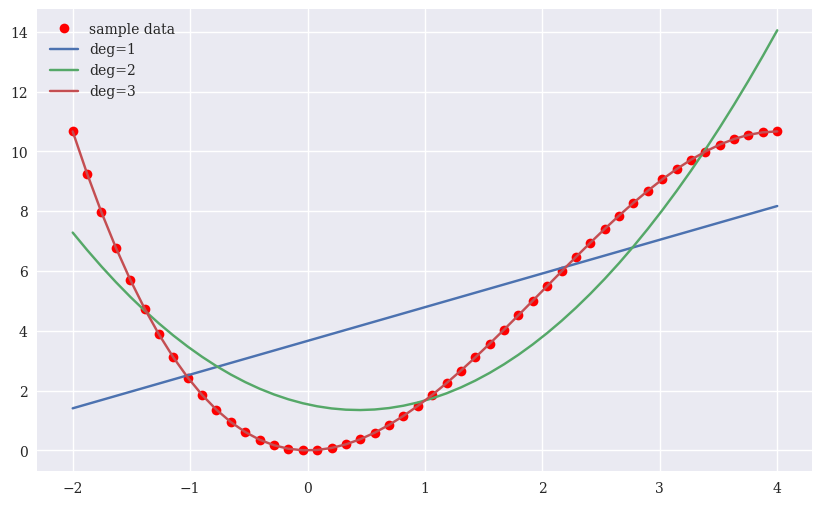

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')

# try fit the data by polynomial with degree of 1,2,3
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg) # computes a least-squares fit with specified 
    y_ = np.polyval(reg, x) # evaluates polynomial specific value with input variable x
    MSE = ((y - y_) ** 2).mean() # evaluation metrics with MSE. 
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
    
plt.legend();

In [ ]:
?MLP

In [14]:
# y = a x**3 + b x**2 + c x + d
reg

array([-0.3333,  2.    ,  0.    , -0.    ])

In [17]:
test_x

array([4.    , 4.0833, 4.1667, 4.25  , 4.3333, 4.4167, 4.5   , 4.5833,
       4.6667, 4.75  , 4.8333, 4.9167, 5.    , 5.0833, 5.1667, 5.25  ,
       5.3333, 5.4167, 5.5   , 5.5833, 5.6667, 5.75  , 5.8333, 5.9167,
       6.    ])

deg=3 | MSE test=0.00000


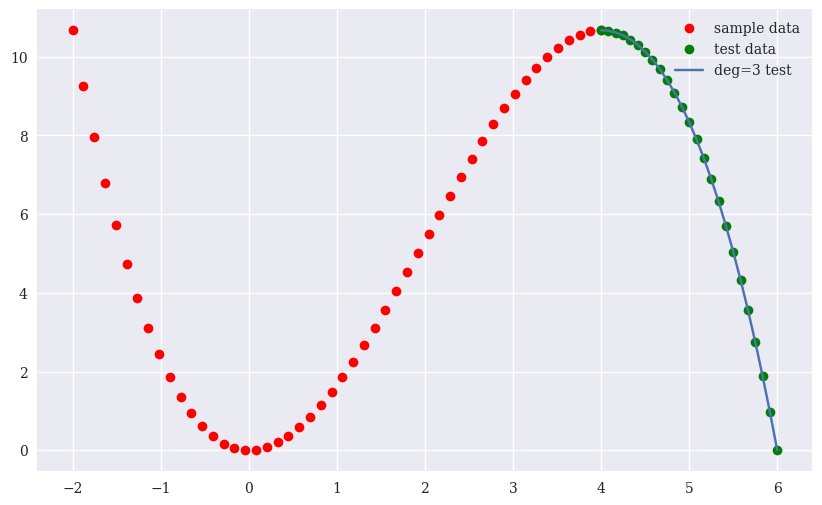

In [16]:
# generate some data for testing
test_x = np.linspace(start=4, stop=6, num= int(totalnum/2) )
test_y = f(test_x)

# calculate the polynomial results
test_y_ = np.polyval(reg,test_x)

MSE_test = ( (test_y_ - test_y)**2 ).mean()
print(f'deg={deg} | MSE test={MSE_test:.5f}')

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(test_x, test_y, 'go', label='test data')
plt.plot(test_x, np.polyval(reg, test_x), label=f'deg={deg}'+ ' test')
plt.legend();

## Neural Network for regression (by sklearn)

In [18]:
# scikit-learn
# https://scikit-learn.org/stable/tutorial/basic/tutorial.html

from sklearn.neural_network import MLPRegressor

Num_Hidden = 256
# model = MLPRegressor(hidden_layer_sizes = Num_Hidden, 
#                      learning_rate_init = 0.03,
#                      max_iter=5000, random_state=1000)

# %time model.fit( x.reshape(-1,1), y )


# you can also try two hidden layers, see the performance...
# hidden_layer_sizes: tuple, the ith element represents the number of neurons in the ith hidden layer.
model = MLPRegressor(hidden_layer_sizes = (Num_Hidden, int(Num_Hidden/2)), 
                     learning_rate_init = 0.03,
                     max_iter=5000, random_state=1000)
%time model.fit( x.reshape(-1,1), y )


CPU times: user 132 ms, sys: 12.6 ms, total: 145 ms
Wall time: 49.2 ms


MLPRegressor(hidden_layer_sizes=(256, 128), learning_rate_init=0.03,
             max_iter=5000, random_state=1000)

In [23]:
y_ = model.predict( x.reshape(-1,1) )

In [18]:
MSE = ((y - y_) ** 2).mean()
MSE

0.13293146947886952

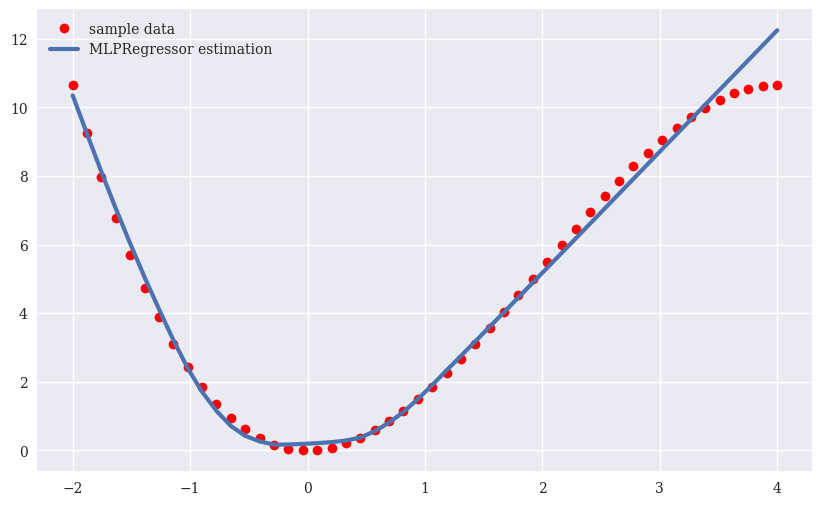

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='MLPRegressor estimation')
plt.legend();

MLPRegressor MSE test=89.58876


'\nNeural network by MLPRegressor test results are so bad, think about why?\n'

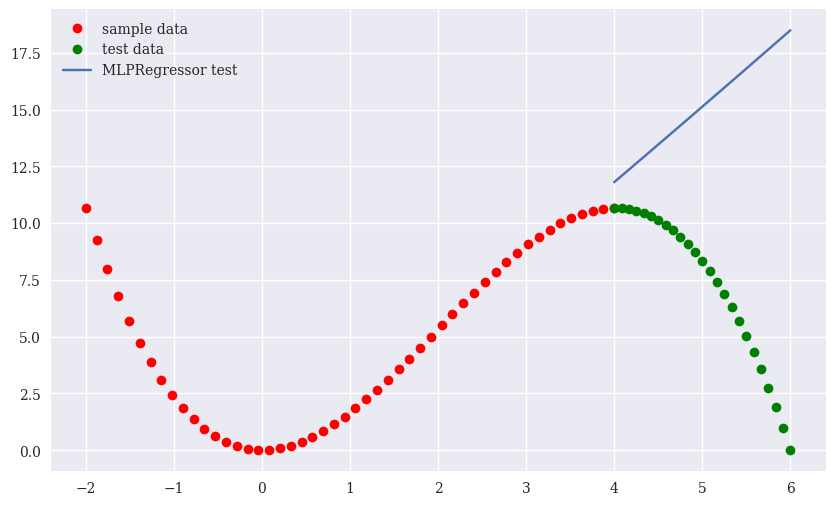

In [20]:
# testing data
test_y_ = model.predict( test_x.reshape(-1,1) )

MSE_test = ( (test_y_ - test_y)**2 ).mean()
print(f'MLPRegressor MSE test={MSE_test:.5f}')

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(test_x, test_y, 'go', label='test data')
fig_1 = plt.plot(test_x, test_y_, label='MLPRegressor test')
plt.legend();

'''
Neural network by MLPRegressor test results are so bad, think about why?
'''

## Neural Network for regression (by Keras)

In [35]:
?Sequential

In [32]:
model = Sequential()
'''
To stack densely-connected NN layer. Dense implements the operation:
output = activation(dot(input, kernel) + bias)
where activation is the element-wise activation function, kernel is a weights matrix created by the layer, 
and bias is a bias vector created by the layer (only applicable if use_bias is True).
'''
model.add(Dense(256, activation='linear', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [33]:
((y - y_) ** 2).mean()

27.612968582552863

2023-01-24 12:38:02.866613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step


2023-01-24 12:38:04.002458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


round=1 | MSE=9.87764
2/2 [==============================] - 0s 2ms/step
round=2 | MSE=9.87749
2/2 [==============================] - 0s 2ms/step
round=3 | MSE=9.87746
2/2 [==============================] - 0s 2ms/step
round=4 | MSE=9.87742
2/2 [==============================] - 0s 2ms/step
round=5 | MSE=9.87739


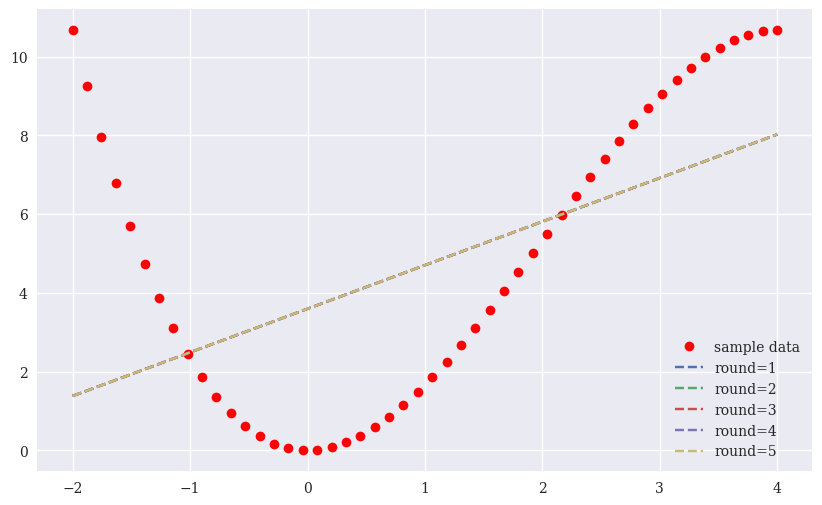

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1,6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Neural Network for regression (with random numbers)

In [24]:
np.random.seed(0)
x = np.linspace(-1, 1, num=25)
y = np.random.random(len(x)) * 2 - 1

In [25]:
len(x)

25

In [26]:
model = Sequential()

# add a dense layer with input dimension of input_dim, output dimension of 256
model.add(Dense(256, activation='relu', input_dim=1))

for _ in range(3):
    model.add(Dense(256, activation='relu'))

# add the final dense layer with output dimension of 1
model.add(Dense(1, activation='linear'))

# compile the defined model
model.compile(loss='mse', optimizer='rmsprop')

In [27]:
# summary of the model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500


2023-01-23 00:24:36.384916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 598ms/step - loss: 0.3576
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3204
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 0.3210
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 0.3261
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3227
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 0.3149
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3131
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 0.3116
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3099
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3082
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3069
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3118
Epoch 13/500
1/1 [==============================] - 0s 11ms/

1/1 [==============================] - 0s 10ms/step - loss: 0.1072
Epoch 205/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0731
Epoch 206/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0622
Epoch 207/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0626
Epoch 208/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0611
Epoch 209/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0645
Epoch 210/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0604
Epoch 211/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0715
Epoch 212/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0653
Epoch 213/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0760
Epoch 214/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0826
Epoch 215/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0794
Epoch 216/500
1/1 [=========================

1/1 [==============================] - 0s 9ms/step - loss: 0.0481
Epoch 407/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0535
Epoch 408/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0622
Epoch 409/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0656
Epoch 410/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0700
Epoch 411/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1054
Epoch 412/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0994
Epoch 413/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0666
Epoch 414/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0564
Epoch 415/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0539
Epoch 416/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0447
Epoch 417/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0441
Epoch 418/500
1/1 [==============================] -

2023-01-23 00:24:42.897686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step - loss: 0.0394
Epoch 14/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0383
Epoch 15/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0371
Epoch 16/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0384
Epoch 17/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0396
Epoch 18/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0439
Epoch 19/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0463
Epoch 20/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0467
Epoch 21/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0417
Epoch 22/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0378
Epoch 23/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0371
Epoch 24/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0350
Epoch 25/500
1/1 [==============================] - 0s 9

1/1 [==============================] - 0s 9ms/step - loss: 0.0507
Epoch 219/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0597
Epoch 220/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0488
Epoch 221/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0415
Epoch 222/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0315
Epoch 223/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0291
Epoch 224/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0306
Epoch 225/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0334
Epoch 226/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0380
Epoch 227/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0425
Epoch 228/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0408
Epoch 229/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0405
Epoch 230/500
1/1 [============================

1/1 [==============================] - 0s 10ms/step - loss: 0.0334
Epoch 321/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0437
Epoch 322/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0572
Epoch 323/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0614
Epoch 324/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0410
Epoch 325/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 326/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0302
Epoch 327/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0336
Epoch 328/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 329/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0372
Epoch 330/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0363
Epoch 331/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0282
Epoch 332/500
1/1 [==============================

1/1 [==============================] - 0s 9ms/step - loss: 0.0317
Epoch 423/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 424/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0324
Epoch 425/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0296
Epoch 426/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0322
Epoch 427/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0321
Epoch 428/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0343
Epoch 429/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0328
Epoch 430/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0319
Epoch 431/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0288
Epoch 432/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0334
Epoch 433/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0433
Epoch 434/500
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 127/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0089
Epoch 128/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 129/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 130/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 131/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0233
Epoch 132/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0329
Epoch 133/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0411
Epoch 134/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0375
Epoch 135/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0298
Epoch 136/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 137/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 138/500
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 331/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 332/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 333/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 334/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 335/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 336/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0056
Epoch 337/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 338/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 339/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0991
Epoch 340/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0761
Epoch 341/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 342/500
1/1 [==============================] 

Epoch 432/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 433/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 434/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 435/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0607
Epoch 436/500
1/1 [==============================] - 0s 9ms/step - loss: 0.1086
Epoch 437/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 438/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 439/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 440/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 441/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 442/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 443/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 444/500
1/1 [===================

1/1 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 136/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 137/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 138/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 139/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 140/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 141/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 142/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 143/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 144/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 145/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 146/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 147/500
1/1 [==============================] -

Epoch 237/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 238/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 239/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 240/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 241/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 242/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 243/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 244/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0301
Epoch 245/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 246/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 247/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0196
Epoch 248/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 249/500
1/1 [===================

1/1 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 442/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 443/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 444/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 445/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 446/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 447/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0058
Epoch 448/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 449/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 450/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0336
Epoch 451/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0517
Epoch 452/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0465
Epoch 453/500
1/1 [==============================] - 

1/1 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 144/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 145/500
1/1 [==============================] - 0s 10ms/step - loss: 7.0807e-04
Epoch 146/500
1/1 [==============================] - 0s 9ms/step - loss: 5.2784e-04
Epoch 147/500
1/1 [==============================] - 0s 10ms/step - loss: 4.2299e-04
Epoch 148/500
1/1 [==============================] - 0s 9ms/step - loss: 3.7079e-04
Epoch 149/500
1/1 [==============================] - 0s 9ms/step - loss: 3.4355e-04
Epoch 150/500
1/1 [==============================] - 0s 10ms/step - loss: 3.6976e-04
Epoch 151/500
1/1 [==============================] - 0s 9ms/step - loss: 4.1254e-04
Epoch 152/500
1/1 [==============================] - 0s 10ms/step - loss: 5.5400e-04
Epoch 153/500
1/1 [==============================] - 0s 10ms/step - loss: 7.5656e-04
Epoch 154/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 155/5

1/1 [==============================] - 0s 10ms/step - loss: 0.0272
Epoch 344/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 345/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 346/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 347/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 348/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 349/500
1/1 [==============================] - 0s 10ms/step - loss: 7.8474e-04
Epoch 350/500
1/1 [==============================] - 0s 9ms/step - loss: 3.5221e-04
Epoch 351/500
1/1 [==============================] - 0s 10ms/step - loss: 2.3652e-04
Epoch 352/500
1/1 [==============================] - 0s 9ms/step - loss: 1.9148e-04
Epoch 353/500
1/1 [==============================] - 0s 9ms/step - loss: 1.6732e-04
Epoch 354/500
1/1 [==============================] - 0s 9ms/step - loss: 1.5020e-04
Epoch 355/500
1/1 [=======

1/1 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 44/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 45/500
1/1 [==============================] - 0s 10ms/step - loss: 8.9162e-04
Epoch 46/500
1/1 [==============================] - 0s 9ms/step - loss: 7.9871e-04
Epoch 47/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 48/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 49/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 50/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 51/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 52/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 53/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 54/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 55/500
1/1 [==============================] - 0

Epoch 243/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 244/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 245/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 246/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 247/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 248/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 249/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 250/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 251/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 252/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 253/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0941
Epoch 254/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 255/500
1/1 [============

1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 442/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 443/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 444/500
1/1 [==============================] - 0s 10ms/step - loss: 6.1388e-04
Epoch 445/500
1/1 [==============================] - 0s 9ms/step - loss: 4.6884e-04
Epoch 446/500
1/1 [==============================] - 0s 10ms/step - loss: 3.7601e-04
Epoch 447/500
1/1 [==============================] - 0s 10ms/step - loss: 4.0211e-04
Epoch 448/500
1/1 [==============================] - 0s 10ms/step - loss: 4.3238e-04
Epoch 449/500
1/1 [==============================] - 0s 11ms/step - loss: 7.2615e-04
Epoch 450/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 451/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 452/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 453/500
1/1 [===

1/1 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 141/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 142/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 143/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 144/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 145/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 146/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 147/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 148/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 149/500
1/1 [==============================] - 0s 9ms/step - loss: 0.1101
Epoch 150/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0205
Epoch 151/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 152/500
1/1 [=============================

1/1 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 339/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 340/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 341/500
1/1 [==============================] - 0s 9ms/step - loss: 6.4593e-04
Epoch 342/500
1/1 [==============================] - 0s 10ms/step - loss: 3.8638e-04
Epoch 343/500
1/1 [==============================] - 0s 10ms/step - loss: 2.4361e-04
Epoch 344/500
1/1 [==============================] - 0s 9ms/step - loss: 1.6757e-04
Epoch 345/500
1/1 [==============================] - 0s 10ms/step - loss: 1.2307e-04
Epoch 346/500
1/1 [==============================] - 0s 10ms/step - loss: 1.0659e-04
Epoch 347/500
1/1 [==============================] - 0s 10ms/step - loss: 1.0102e-04
Epoch 348/500
1/1 [==============================] - 0s 9ms/step - loss: 1.2297e-04
Epoch 349/500
1/1 [==============================] - 0s 10ms/step - loss: 1.5084e-04
Epoch 350

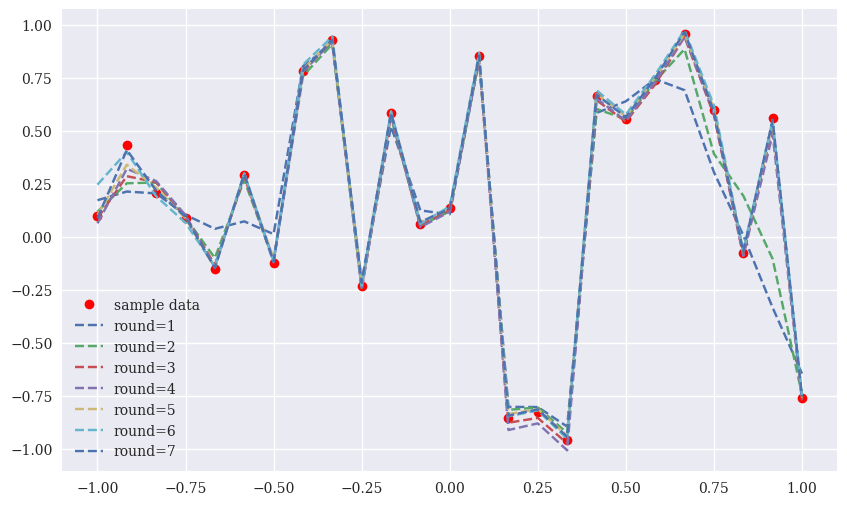

In [28]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=True)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Neural Network for classification (random number)

In [37]:
# f: number of features; n: number of samples
# generate random samples to test the difference of big/small data
f = 10
n = 2000

In [38]:
np.random.seed(100)

In [39]:
x = np.random.randint(low=-10, high=10, size=(n,f))
x[1:10,:3]

array([[ -8,   7,   6],
       [ -6,  -9,   3],
       [ -9,   4,  -3],
       [  6,   5,  -3],
       [  7,  -2,   3],
       [-10,   3,   2],
       [ -7,  -1,   6],
       [  8,   3,   2],
       [  8,  -6,  -7]])

In [40]:
y = np.random.randint(0, 2, n)
y[1:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 1])

In [41]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [42]:
h = model.fit(x, y, epochs=100, verbose=False)

2023-01-24 12:41:13.073688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [35]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_[1:10]

63/63 [==============================] - 0s 2ms/step


2023-01-23 00:25:50.496951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([0, 1, 0, 0, 1, 1, 0, 1, 0])

In [43]:
result = y == y_
print(f'samples={n} | accuracy={sum(result)/len(result):.5f}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [37]:
res = pd.DataFrame(h.history)

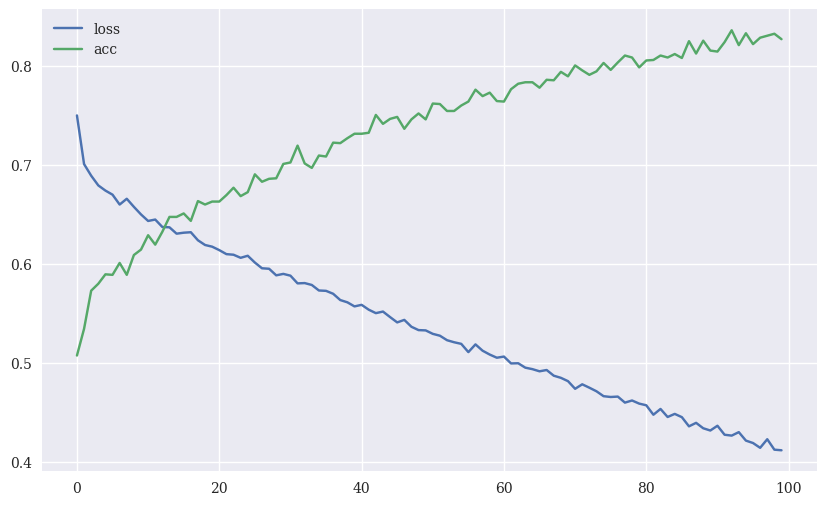

In [38]:
res.plot(figsize=(10, 6));

63/63 [==============================] - 0s 2ms/step
samples=2000 | accuracy=0.92000


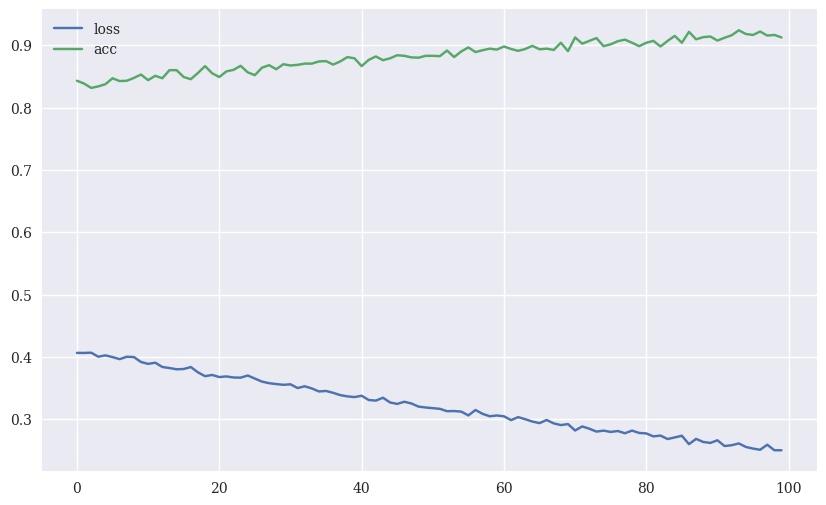

In [39]:
h = model.fit(x, y, epochs=100, verbose=False)
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
result = y == y_
print(f'samples={n} | accuracy={sum(result)/len(result):.5f}')
res = pd.DataFrame(h.history)
res.plot(figsize=(10, 6));


# Self Study

## Linear

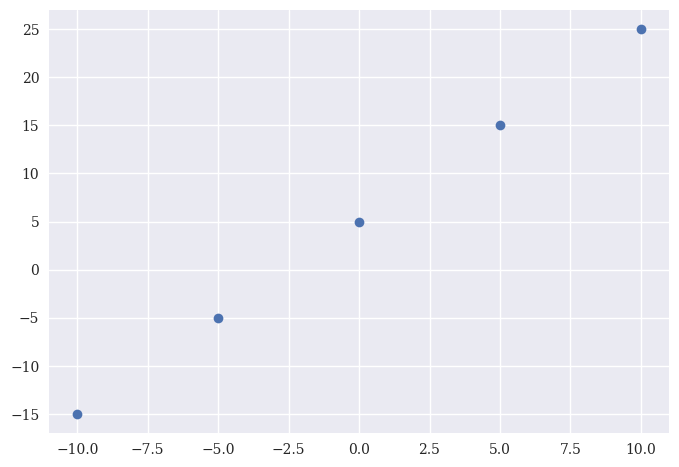

In [19]:
import matplotlib.pyplot as mp
import numpy as np
x = np.linspace( -10 , 10 , 5 )
y = 2*x + 5
mp.plot( x , y , 'o' )

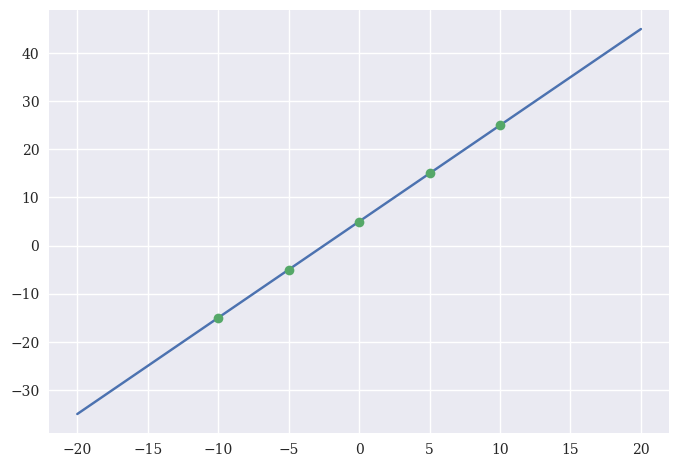

In [20]:
import matplotlib.pyplot as mp
import numpy as np
x = np.linspace( -10 , 10 , 5 ) # making a linear line starting from -10 to 10.
y = 2*x + 5 # create a y function of x
coeff = np.polyfit(x,y,2) # fitting the line, with degree of 2.
xn = np.linspace(-20,20,100) # create another line starting from x (-20 to 20)
yn = np.poly1d(coeff)  # helps to define a polynomial function
mp.plot( xn,yn(xn),x,y,'o')